In [756]:
import pandas as pd
import numpy as np
from numpy import inf
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [757]:
import os
os.chdir('/Users/KevinShao/Desktop/adsi_group2leftfeet')

In [758]:
df_train = pd.read_csv('data/raw/train.csv')

In [759]:
df_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [735]:
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [760]:
#Feature engineering

df_train['GP'] = df_train['GP'].abs()
df_train['BLK'] = df_train['BLK'].abs()
df_train['3P Made'] = df_train['3P Made'].abs()
df_train['3PA'] = df_train['3PA'].abs()

In [709]:
# Other Feature Engineering tested

df_train['GP'] = df_train['GP'].abs()
df_train['BLK'] = df_train['BLK'].abs()
df_train['3P Made'] = df_train['3P Made'].abs()
df_train['3PA'] = df_train['3PA'].abs()

df_train['MIN']=df_train['MIN']*df_train['GP']
df_train['PTS']=df_train['PTS']*df_train['GP']
df_train['MIN']=df_train['MIN']*df_train['GP']
df_train['OREB']=df_train['OREB']*df_train['GP']
df_train['DREB']=df_train['DREB']*df_train['GP']
df_train['AST']=df_train['AST']*df_train['GP']
df_train['STL']=df_train['STL']*df_train['GP']
df_train['BLK']=df_train['BLK']*df_train['GP']
df_train['TOV']=df_train['TOV']*df_train['GP']
df_train['3P%'] = ((df_train['3P Made']*df_train['GP'])/(df_train['3PA']*df_train['GP']))*100
df_train = df_train.replace([np.inf, -np.inf], np.nan)
df_train['3P%'].fillna(0, inplace=True)
df_train['FG%'] = ((df_train['FGM']*df_train['GP'])/(df_train['FGA']*df_train['GP']))*100
df_train['FG%'].fillna(0, inplace=True)
df_train['FT%'] = ((df_train['FTM']*df_train['GP'])/(df_train['FTA']*df_train['GP']))*100
df_train['FT%'].fillna(0, inplace=True)
df_train=df_train.drop(columns=['GP','FGM','FGA','3P Made','3PA','FTM', 'FTA','REB'])

In [710]:
df_train.describe()

,Id,MIN,PTS,FG%,3P%,FT%,OREB,DREB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,90743.843913,498.969350,44.627629,35.465489,71.222666,73.079700,147.861237,111.317225,44.026713,25.304088,85.618763,0.833625
std,2309.54541,86278.028778,400.925493,6.273097,22.718771,12.265024,65.036598,123.436990,112.702632,35.597136,58.450973,66.281512,0.372440
min,3799.00000,5.000000,1.200000,25.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.300000,0.000000
25%,5798.75000,33825.600000,221.850000,40.186916,28.571429,63.888889,27.450000,62.400000,35.000000,18.600000,7.400000,39.200000,1.000000
50%,7798.50000,64685.600000,387.600000,44.444444,33.333333,70.833333,54.600000,113.400000,77.000000,34.500000,15.300000,68.200000,1.000000
75%,9798.25000,120363.450000,666.100000,48.687071,40.000000,77.777778,98.800000,195.000000,147.925000,59.200000,27.200000,113.400000,1.000000
max,11798.00000,986803.400000,4138.200000,72.413793,300.000000,133.333333,616.000000,1069.500000,1254.400000,402.500000,1736.500000,592.900000,1.000000


In [761]:
#Drop this variable as its not needed
df_train.drop('Id', axis=1, inplace=True)

In [762]:
df_train.columns = df_train.columns.str.strip()

In [763]:
print(df_train['TARGET_5Yrs'].value_counts())

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64


In [764]:
#Extract the target variable in this case the target_5yrs
target = df_train.pop('TARGET_5Yrs')

In [765]:
#Get column names for feature importance or coefficient dataframe
columns = df_train.columns

In [766]:
#Normalizing the data as some might have % and other might have higher value such as GP and MIN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)

In [555]:
#Undersampling
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()  
x_res, y_res = cc.fit_sample(df_train, target)

In [767]:
#Upsmapling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=8)
x_res, y_res = sm.fit_sample(df_train, target)
print(target.value_counts(), np.bincount(y_res))

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64 [6669 6669]


In [769]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split (x_res, y_res, test_size=0.3, random_state=8)

In [744]:
print(y_train.value_counts())

0    4692
1    4644
Name: TARGET_5Yrs, dtype: int64


In [696]:
#Polynomial Testing
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [770]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l1','l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.699057 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.699006 (0.016780) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.699025 (0.016785) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.699014 (0.016795) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.699028 (0.016789) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.698951 (0.016736) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.699057 (0.016798) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.698691 (0.017044) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.698948 (0.016821) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'elasticnet'

In [771]:
logreg = LogisticRegression(C = 1, penalty = 'l2', solver = 'liblinear' )
logreg.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [772]:
pd.DataFrame(zip(columns, np.transpose(logreg.coef_.tolist()[0])))

,0,1
0,GP,0.508484
1,MIN,-0.039280
2,PTS,-0.408105
3,FGM,0.613777
4,FGA,-0.282909
5,FG%,0.149884
6,3P Made,0.239520
7,3PA,-0.168357
8,3P%,0.057992
9,FTM,-0.024951


In [773]:
from joblib import dump
dump(logreg,'models/Logistic_sampled_tuned.joblib')

['models/Logistic_sampled_tuned.joblib']

In [774]:
y_pred = logreg.predict(X_test)

In [775]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1367  610]
 [ 730 1295]]


In [776]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1977
           1       0.68      0.64      0.66      2025

    accuracy                           0.67      4002
   macro avg       0.67      0.67      0.67      4002
weighted avg       0.67      0.67      0.66      4002



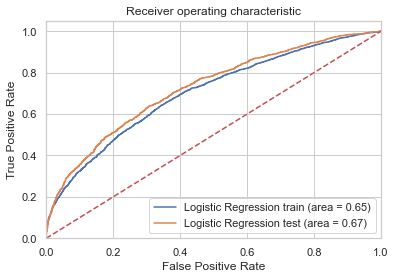

In [777]:
logit_roc_auc_test = roc_auc_score(y_test, logreg.predict(X_test))
logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression train (area = %0.2f)' % logit_roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Logistic Regression test (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [778]:
#ROC of Upsampled and Hyper Parameter Tuning
roc_train=roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
roc_test=roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(roc_train)
print(roc_test)

0.7015798511293069
0.7244981484603807


In [779]:
df = pd.read_csv('data/raw/test.csv')

In [780]:
df['GP'] = df['GP'].abs()
df['BLK'] = df['BLK'].abs()
df['3P Made'] = df['3P Made'].abs()
df['3PA'] = df['3PA'].abs()

In [727]:
df['GP'] = df['GP'].abs()
df['BLK'] = df['BLK'].abs()
df['3P Made'] = df['3P Made'].abs()
df['3PA'] = df['3PA'].abs()

df['MIN']=df['MIN']*df['GP']
df['PTS']=df['PTS']*df['GP']
df['MIN']=df['MIN']*df['GP']
df['OREB']=df['OREB']*df['GP']
df['DREB']=df['DREB']*df['GP']
df['AST']=df['AST']*df['GP']
df['STL']=df['STL']*df['GP']
df['BLK']=df['BLK']*df['GP']
df['TOV']=df['TOV']*df['GP']
df['3P%'] = ((df['3P Made']*df['GP'])/(df['3PA']*df['GP']))*100
df = df.replace([np.inf, -np.inf], np.nan)
df['3P%'].fillna(0, inplace=True)
df['FG%'] = ((df['FGM']*df['GP'])/(df['FGA']*df['GP']))*100
df['FG%'].fillna(0, inplace=True)
df['FT%'] = ((df['FTM']*df['GP'])/(df['FTA']*df['GP']))*100
df['FT%'].fillna(0, inplace=True)
df=df.drop(columns=['GP','FGM','FGA','3P Made','3PA','FTM', 'FTA','REB'])

In [781]:
df1=df.loc[:, df.columns != 'Id']

In [782]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [671]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
df1 = poly.fit_transform(df1)

In [783]:
y_pred_sub = pd.DataFrame({'TARGET_5Yrs':logreg.predict(df1)})

In [784]:
df_out = pd.merge(df.iloc[:, 0], y_pred_sub, left_index = True, right_index = True)

In [785]:
df_out.to_csv(r'data/submission/submission.csv', index = False)